Investigate High Paying Job Skills

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
import ast

#loading data
dataset = load_dataset('coachprerakmehta/data_jobs')
df = dataset['train'].to_pandas()

#data cleaning
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) and pd.notna(x) else x)
#If it's already a list (or is NaN), leave it as-is.

In [3]:
#Only get Data Analyst jobs in US
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

#Drop NaN values from 'salary_year_avg' for accurate visualization
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

In [6]:
df_DA_US = df_DA_US.explode('job_skills')
df_DA_US['job_skills']

109        python
109             r
109       alteryx
109       tableau
180         excel
           ...   
784882        sql
784882        vba
784882    tableau
784882      excel
784882    alteryx
Name: job_skills, Length: 17440, dtype: object

In [42]:
df_DA_US_group = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])
df_DA_US_group
#Groups the data by unique values in the job_skills column.
#Selects the salary_year_avg column for aggregation — i.e., we're only interested in analyzing salary.

,count,median
job_skills,,
airflow,44,116250.00
airtable,5,90000.00
alteryx,106,106281.25
angular,8,107500.00
ansible,1,159640.00
...,...,...
wire,4,74250.00
word,461,81194.75
workfront,3,75000.00


In [11]:
df_DA_top_pay = df_DA_US_group.sort_values(by='median', ascending=False).head(10)
df_DA_top_pay

,count,median
job_skills,,
dplyr,2,196250.0
bitbucket,3,189000.0
gitlab,3,186000.0
solidity,1,179000.0
hugging face,1,175000.0
couchbase,1,160515.0
ansible,1,159640.0
mxnet,2,149000.0
cassandra,6,148250.0


In [26]:
df_DA_skills = df_DA_US_group.sort_values(by='count', ascending=False).head(10).sort_values(by='median', ascending=False)
#first sorting accoring to count, then by median salary
df_DA_skills

,count,median
job_skills,,
python,1431,97500.00
tableau,1364,92875.00
r,893,92500.00
sql server,286,92500.00
sql,2508,91000.00
sas,926,90000.00
power bi,838,90000.00
powerpoint,462,85000.00
excel,1808,84392.00


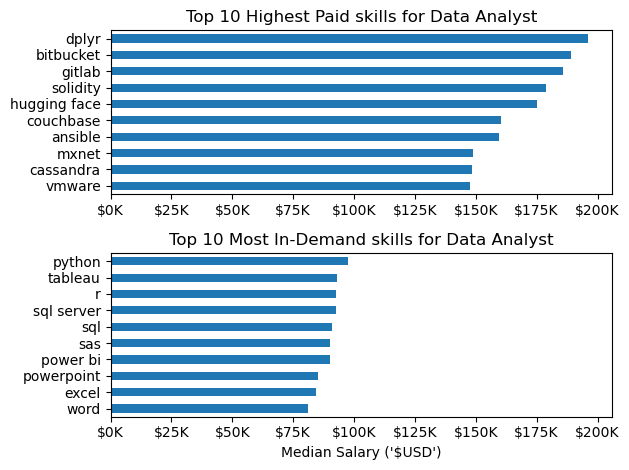

In [41]:
fig, ax = plt.subplots(2, 1)
df_DA_top_pay.plot(kind='barh', y='median', ax=ax[0], legend=False)           #for plotting this graph on the 1st subplot
ax[0].invert_yaxis()
ax[0].set_title('Top 10 Highest Paid skills for Data Analyst')
ax[0].set_ylabel("")
ax[0].set_xlabel("")
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))


df_DA_skills.plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].invert_yaxis()
ax[1].set_xlim(ax[0].get_xlim())        #sets the xlim of 2nd subplot equal to the 1st subplot
ax[1].set_title('Top 10 Most In-Demand skills for Data Analyst')
ax[1].set_ylabel("")
ax[1].set_xlabel("Median Salary ('$USD')")
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

plt.tight_layout()